# Notebook for Deliverable 2

Getting the data:

* Go to https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires?datasetId=2478&sortBy=voteCount
* Download dataset by clicking Download in upper-right.
* Unzip archive and place in 'data' folder in this repo.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#connect to sqlite db
DB_PATH = './data/FPA_FOD_20170508.sqlite'
db_connection = sqlite3.connect(DB_PATH)

In [3]:
df_tables_in_db = pd.read_sql_query("SELECT name FROM sqlite_schema WHERE type='table' ORDER BY name;", db_connection)

In [4]:
# get a list of all the tables in the DB
df_tables_in_db

,name
0,ElementaryGeometries
1,Fires
2,KNN
3,NWCG_UnitIDActive_20170109
4,SpatialIndex
5,geometry_columns
6,geometry_columns_auth
7,geometry_columns_field_infos
8,geometry_columns_statistics
9,geometry_columns_time


In [5]:
# read the Fires table into a dataframe
df_fires = pd.read_sql_query("SELECT * FROM 'Fires'", db_connection)

In [6]:
# read the Fires Shape table into a dataframe
df_fires_shape = pd.read_sql_query("SELECT * FROM 'idx_Fires_Shape'", db_connection)

### Fires shape

In [7]:
df_fires_shape.shape

(1880465, 5)

In [8]:
df_fires_shape.head()

,pkid,xmin,xmax,ymin,ymax
0,1064078,-166.869400,-166.869385,65.982597,65.982605
1,1064195,-166.269302,-166.269287,65.115898,65.115906
2,1729139,-166.166702,-166.166687,65.833298,65.833305
3,1064196,-166.152725,-166.152695,65.182594,65.182602
4,1064225,-166.029404,-166.029373,65.926895,65.926903


In [9]:
## TODO: is fire shape useful? need to investigate what these values represent and if it can be used

### Fires

In [10]:
df_fires.shape

(1880465, 39)

In [11]:
df_fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [23]:
df_fires.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [25]:
columns_of_interest = ['FIRE_YEAR','STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE','LATITUDE','LONGITUDE','STATE','DISCOVERY_DATE','FIRE_SIZE']

df_fires[columns_of_interest].head()

,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE
0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,2453403.5,0.10
1,2004,Lightning,1.0,38.933056,-120.404444,CA,2453137.5,0.25
2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,2453156.5,0.10
3,2004,Lightning,1.0,38.559167,-119.913333,CA,2453184.5,0.10
4,2004,Lightning,1.0,38.559167,-119.933056,CA,2453184.5,0.10


## 1.) Data Exploration

<AxesSubplot:>

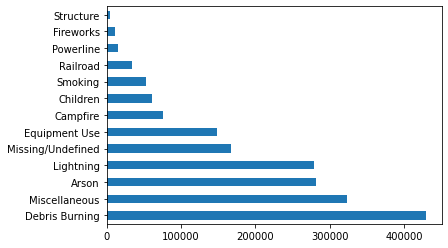

In [12]:
df_fires['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh')

FIRESIZECLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

FIRE_SIZE = Estimate of acres within the final perimeter of the fire.


<AxesSubplot:>

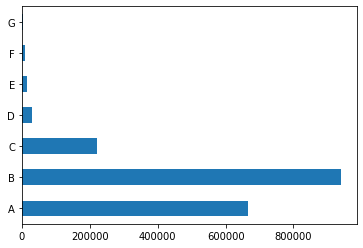

In [27]:
df_fires['FIRE_SIZE_CLASS'].value_counts().sort_index().plot(kind='barh')

In [14]:
## Look at value counts by state
## Note that this includes Puerto Rico (PR) and Virgin Islands (VI), so 52 indices total
df_fires['STATE'].value_counts().to_frame()

,STATE
CA,189550
GA,168867
TX,142021
NC,111277
FL,90261
SC,81315
NY,80870
MS,79230
AZ,71586
AL,66570


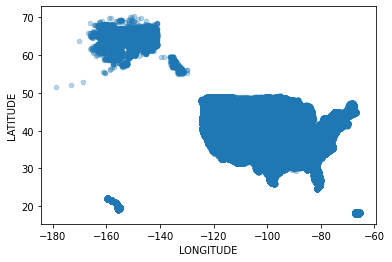

In [15]:
df_fires.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.3)
plt.show()

In [16]:
df_fires['FIRE_YEAR'].value_counts().sort_index()

1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: FIRE_YEAR, dtype: int64

In [ ]:
## todo multiple boxplots for categorical data

<AxesSubplot:title={'center':'FIRE_SIZE'}, xlabel='STAT_CAUSE_DESCR'>

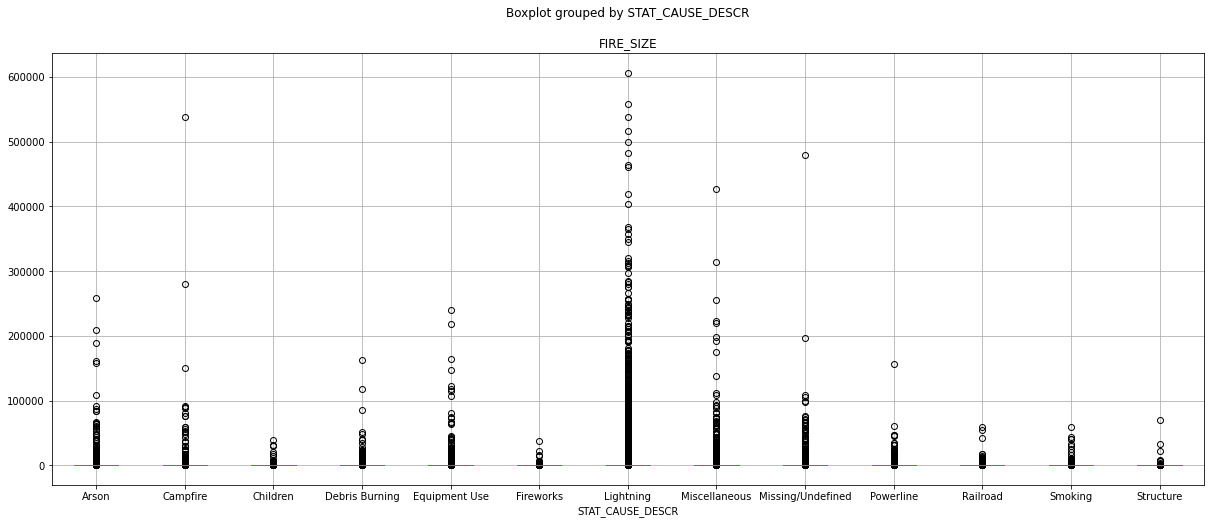

In [17]:
# boxplot of fire size on cause of fire
df_fires.boxplot(by ='STAT_CAUSE_DESCR', column =['FIRE_SIZE'], grid = True, figsize=(20,8))

<AxesSubplot:xlabel='FIRE_YEAR', ylabel='FIRE_SIZE'>

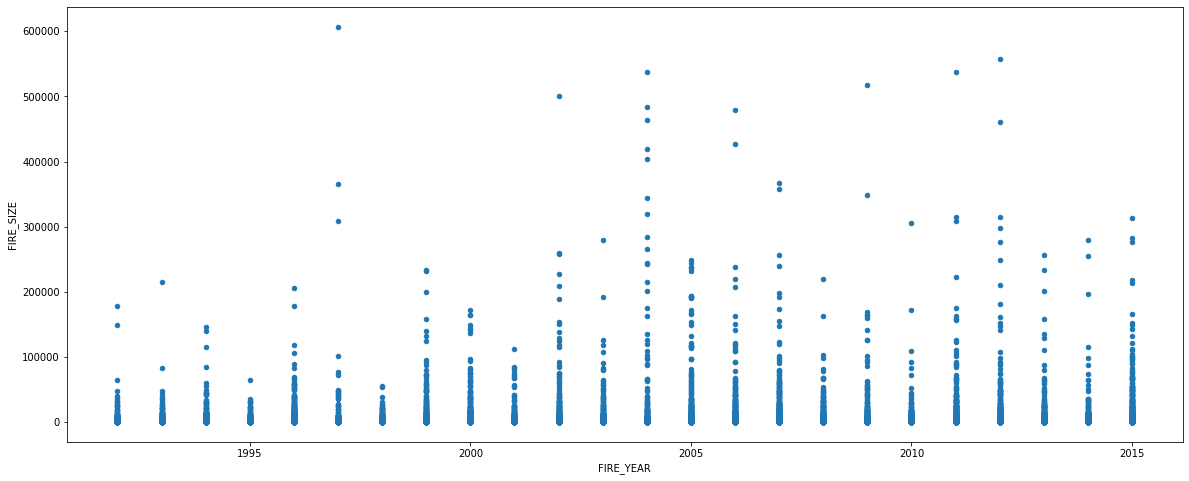

In [18]:
# plot fire size vs fire year
df_fires.plot.scatter(x='FIRE_YEAR', y='FIRE_SIZE', figsize=(20, 8))

/var/folders/ln/9hfbz9nd2rb57qtbwnq6ksl40000gp/T/ipykernel_2528/1605039361.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


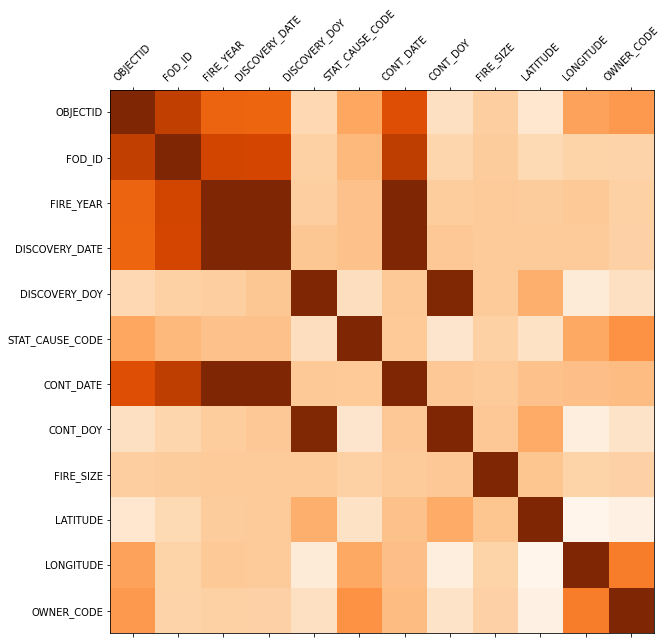

In [19]:
#correlation

def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

plot_corr(df_fires)

#TODO show all columns ?

/var/folders/ln/9hfbz9nd2rb57qtbwnq6ksl40000gp/T/ipykernel_2528/1605039361.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


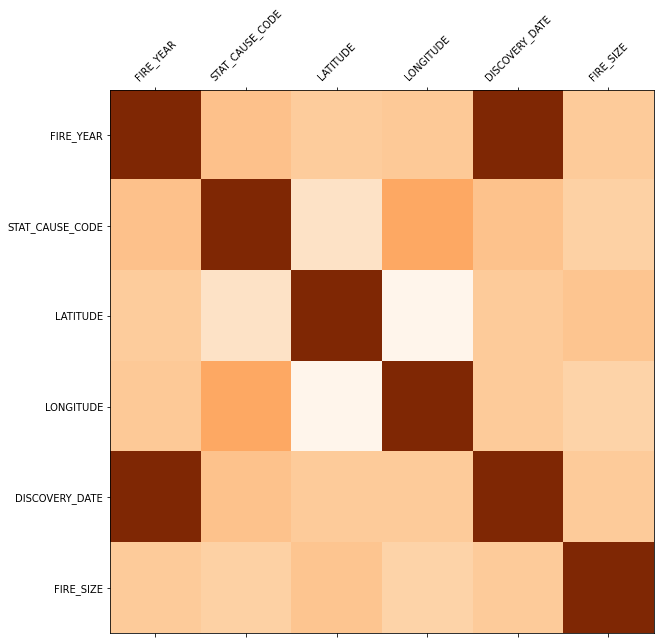

In [26]:
plot_corr(df_fires[columns_of_interest])

## 2.) Cleaning and Sampling

In [22]:
# TODO
# encode qualitative columns: STAT_CAUSE_DESCR, STATE
# parse datetime for DISCOVERY_DATE
#      create day of week and month columns?
# should latitude and longitude be scaled ? how do we effectively use Lat and Long ?

